# Graded quiz. Confidence intervals

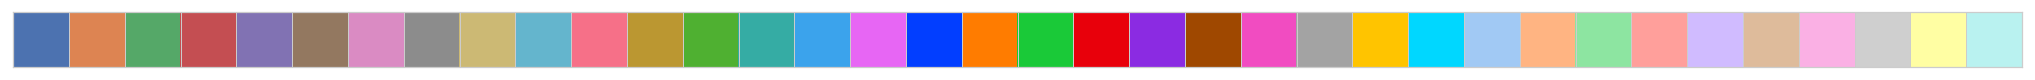

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

In [38]:
def r4(*kargs):
    return [round(x, 4) for x in kargs] if len(kargs) > 1 else round(kargs[0], 4)

def r4s(a):
    return r4(*a)

## 01. Question 1

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X \sim N (\mu,\sigma^2)$ лежит в интервале $\mu \pm c \cdot \sigma$. Чему равно точное значение константы c? Округлите ответ до четырёх знаков после десятичной точки.

In [39]:
alpha = 1 - 0.997
r4(sts.norm.ppf(1 - alpha/2))

2.9677

## 02. Question 2

Пусть $X \sim N (\mu, \sigma^2)$. Какое распределение имеет величина $\frac{\bar{X}_n - \mu}{S_n / \sqrt{n}}$?

__answered__ $St(n-1)$

## 03. Question 3

Выберите все распределения с несимметричной функцией плотности

## 04. Question 4

Какое из выражений задаёт доверительный интервал для разности долей в связанных выборках?

## 05. Question 5

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [60]:
n_aspirin = 11037
n_placebo = 11034

heart_attack_aspirin = 104
heart_attack_placebo = 189

p_aspirin = float(heart_attack_aspirin) / n_aspirin
p_placebo = float(heart_attack_placebo) / n_placebo

print r4(p_aspirin, p_placebo, p_placebo - p_aspirin)

[0.0094, 0.0171, 0.0077]


## 06. Question 6

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

Берем из практических занятий формулу для разности распределений (см переменную error_margin)

In [61]:
def proportions_confint_diff_ind(p1, n1, p2, n2, alpha = 0.05):
    z = sts.norm.ppf(1 - alpha / 2.)
    error_margin = z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    left_boundary = (p1 - p2) - error_margin
    right_boundary = (p1 - p2) + error_margin
    
    return (left_boundary, right_boundary)

confint = r4s(proportions_confint_diff_ind(p_placebo, n_placebo, p_aspirin, n_aspirin))
print confint
print confint[1]

[0.0047, 0.0107]
0.0107


## 07. Question 7

Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин $X \sim Ber(p)$ часто вычисляют величину $\frac{p}{1-p}$, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо $p$ нужно подставить $\hat{p}$.

Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как $\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174$

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [62]:
def odds(p):
    return p / (1 - p)

odds_arr = list(map(odds, [p_placebo, p_aspirin]))
print r4s(odds_arr)

print r4(odds_arr[0] / odds_arr[1])

[0.0174, 0.0095]
1.8321


## 08. Question 8

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

- составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
- установите random seed=0;
- сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [72]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def get_general_sample(n, success_cnt):
    return np.array([1] * success_cnt + [0] * (n - success_cnt))

def get_odds(sample):
    return odds(float(sum(sample)) / len(sample))

def get_odds_ratio(sample_pair):
    return get_odds(sample_pair[0]) / get_odds(sample_pair[1])

placebo_gen_sample = get_general_sample(n_placebo, heart_attack_placebo)
aspirin_gen_sample = get_general_sample(n_aspirin, heart_attack_aspirin)

np.random.seed(0)

pseudosamples = zip(
    get_bootstrap_samples(placebo_gen_sample, 1000),
    get_bootstrap_samples(aspirin_gen_sample, 1000)
)

odds_ratios = list(map(get_odds_ratio, pseudosamples))

print r4s(odds_ratios[:3])

odds_confint = stat_intervals(odds_ratios)
print r4s(odds_confint)

r4(odds_confint[0])

[2.1053, 1.9255, 2.2171]
[1.4629, 2.3509]


1.4629